# Model to Predict Road Deployment

# 1. Perkenalan

Nama        : Harun\
Batch       : RMT-035\
Data        : [Data Project](https://www.kaggle.com/datasets/virenbr11/pothole-and-plain-rode-images)\
Objektif    : Membangun model machine learning berbasis computer vision yang mampu mendeteksi dan mengklasifikasikan gambar jalan berlubang dengan akurasi tinggi, untuk membantu pihak-pihak terkait dalam mengidentifikasi kondisi jalan secara otomatis.

Tujuan utama dari pembangunan model ini adalah untuk meningkatkan efisiensi deteksi kerusakan jalan, mempercepat perbaikan, dan mengurangi risiko kecelakaan akibat jalan berlubang.

Deployment  : [deploy](https://huggingface.co/spaces/HarunYoel/CNN_Model_to_Predict_Road_Condition)







## 1.1 Introduction

Kerusakan jalan, terutama jalan berlubang, merupakan masalah umum yang sering kali berdampak serius pada keselamatan pengguna jalan dan biaya perawatan infrastruktur. Jalan berlubang dapat menyebabkan kecelakaan, kerusakan kendaraan, dan menurunkan kenyamanan berkendara. Saat ini, deteksi dan pemantauan kondisi jalan umumnya masih dilakukan secara manual, yang memakan waktu, sumber daya, dan seringkali kurang efisien.

Dengan kemajuan teknologi, pendekatan berbasis machine learning dan computer vision telah membuka peluang untuk otomatisasi dalam proses deteksi kerusakan jalan. Model berbasis computer vision mampu menganalisis gambar jalan secara otomatis dan cepat, memberikan hasil yang lebih akurat dibandingkan metode konvensional. Pembangunan model ini bertujuan untuk mendeteksi dan mengklasifikasikan kondisi jalan, baik jalan berlubang (pothole) maupun jalan mulus (plain), dengan tingkat akurasi tinggi.

Model yang dihasilkan akan sangat bermanfaat bagi pihak pemerintah, operator infrastruktur, dan pengguna jalan dalam mengidentifikasi kondisi jalan secara otomatis. Dengan sistem deteksi yang lebih efisien, proses pemeliharaan jalan dapat dipercepat, prioritas perbaikan dapat ditentukan dengan lebih tepat, dan risiko kecelakaan dapat diminimalkan.

## 1.2 Problem Statement

Membangun model machine learning berbasis computer vision untuk mendeteksi dan mengklasifikasikan gambar jalan berlubang secara otomatis dengan akurasi tinggi sangat penting untuk meningkatkan efisiensi deteksi kerusakan jalan. Jalan berlubang sering menyebabkan kecelakaan dan kerusakan kendaraan, sementara metode deteksi manual saat ini memakan waktu dan biaya yang besar. Dengan model ini, diharapkan proses perbaikan dapat dipercepat, risiko kecelakaan dapat diminimalkan, dan efisiensi pemeliharaan infrastruktur dapat meningkat.

## 1.3 Data Description

Dataset yang digunakan dalam proyek ini terdiri dari gambar-gambar yang merepresentasikan kondisi jalan, yaitu pothole (jalan berlubang) dan plain (jalan mulus).
Dataset ini diambil dari Pothole and Plain Road Images di Kaggle.

# 2. Import Libraries

In [ ]:
# Downgrade version of TensorFlow and tf-keras

!pip install --upgrade "tensorflow<2.16" "tf-keras<2.16"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled ke

Downgrade berhasil dilakukan

In [ ]:
# Import libraries yang dibutuhkan

import os
import cv2
import glob
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
import tensorflow as tf
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Input
import shutil
from sklearn.metrics import confusion_matrix, classification_report
import warnings
from keras.applications.vgg16 import VGG16, preprocess_input
warnings.filterwarnings('ignore')


Libraries berhasil di import

# 3. Data loading

Data bersumber dari Kaggle sehingga akan dilakukan data loading dengan terlebih dahulu menghubungkan kaggle dengan collab.

In [ ]:
# Install Kaggle library in Google Collaboratory

## Install Kaggle library
!pip install kaggle

## Make a directory named `.kaggle`
!mkdir ~/.kaggle

## Copy the kaggle.json into this new directory
!cp kaggle.json ~/.kaggle/

## Change permission for this directory :
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


collab dan kaggle berhasil terhubung

In [ ]:
%%time
# Download Dataset
# Source dataset : https://www.kaggle.com/datasets/virenbr11/pothole-and-plain-rode-images

!kaggle datasets download -d virenbr11/pothole-and-plain-rode-images

Dataset URL: https://www.kaggle.com/datasets/virenbr11/pothole-and-plain-rode-images
License(s): unknown
 99% 238M/241M [00:13<00:00, 20.6MB/s]
100% 241M/241M [00:13<00:00, 18.3MB/s]
CPU times: user 163 ms, sys: 32 ms, total: 195 ms
Wall time: 16.8 s


Dataset pada kaggle berhasil di download.

In [ ]:
# Every dataset that downloaded from Kaggle, is in format `.zip`. So, we must unzip it before we can using the dataset.

!unzip ./pothole-and-plain-rode-images.zip

Archive:  ./pothole-and-plain-rode-images.zip
  inflating: My Dataset/test/Plain/1.jpg  
  inflating: My Dataset/test/Plain/2.jpg  
  inflating: My Dataset/test/Plain/3.jpg  
  inflating: My Dataset/test/Plain/4.jpg  
  inflating: My Dataset/test/Plain/5.jpg  
  inflating: My Dataset/test/Plain/6.jpg  
  inflating: My Dataset/test/Plain/7.jpg  
  inflating: My Dataset/test/Plain/8.jpg  
  inflating: My Dataset/test/Pothole/1.jpg  
  inflating: My Dataset/test/Pothole/2.jpg  
  inflating: My Dataset/test/Pothole/3.jpg  
  inflating: My Dataset/test/Pothole/4.jpg  
  inflating: My Dataset/test/Pothole/5.jpg  
  inflating: My Dataset/test/Pothole/6.jpg  
  inflating: My Dataset/test/Pothole/7.jpg  
  inflating: My Dataset/test/Pothole/8.jpg  
  inflating: My Dataset/train/Plain/1.6.jpg  
  inflating: My Dataset/train/Plain/1.Longeststraight0.jpg  
  inflating: My Dataset/train/Plain/1.jpg  
  inflating: My Dataset/train/Plain/1.maxresdefault.jpg  
  inflating: My Dataset/train/Plain/1.smo

Karena dataset berbentuk folder zip maka dilakukan unzip sehingga file dapat terbuka.

In [ ]:
# Define path
main_path = '/content/My Dataset'
train_path = os.path.join(main_path, 'train')
test_path = os.path.join(main_path, 'test')

# Check the path
print(train_path)
print(test_path)

/content/My Dataset/train
/content/My Dataset/test


In [ ]:
# Check how many data in `train_path` and `test_path`

def check_path(path):
  labels = os.listdir(path)
  for label in labels:
    num_data = len(os.listdir(os.path.join(path, label)))
    print(f'Total Data - {label} : {num_data}')

print('Train Path')
check_path(train_path)
print('')

print('Test Path')
check_path(test_path)
print('')

Train Path
Total Data - Pothole : 357
Total Data - Plain : 367

Test Path
Total Data - Pothole : 8
Total Data - Plain : 8



Baik dalam train path maupun test path terdapat 2 kelas.

In [ ]:
def plot_images(path):
    labels = os.listdir(path)
    for label in labels:
        folder_path = os.path.join(path, label)
        fig = plt.figure(figsize=(20, 20))
        columns = 5
        rows = 1
        print('Class : ', label)
        images = os.listdir(folder_path)

        total_images = min(len(images), columns*rows)

        for index in range(total_images):
            fig.add_subplot(rows, columns, index+1)
            image_path = os.path.join(folder_path, images[index])

            # Filter untuk hanya membaca file yang valid
            if image_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                try:
                    img = Image.open(image_path)
                    img.verify()  # Memeriksa apakah file valid
                    img = plt.imread(image_path)
                    plt.imshow(img)
                    plt.axis("off")
                except (IOError, SyntaxError) as e:
                    print(f"Skipping invalid file {image_path}: {e}")
            else:
                print(f"Skipping non-image file: {image_path}")
        plt.show()

Class :  Pothole


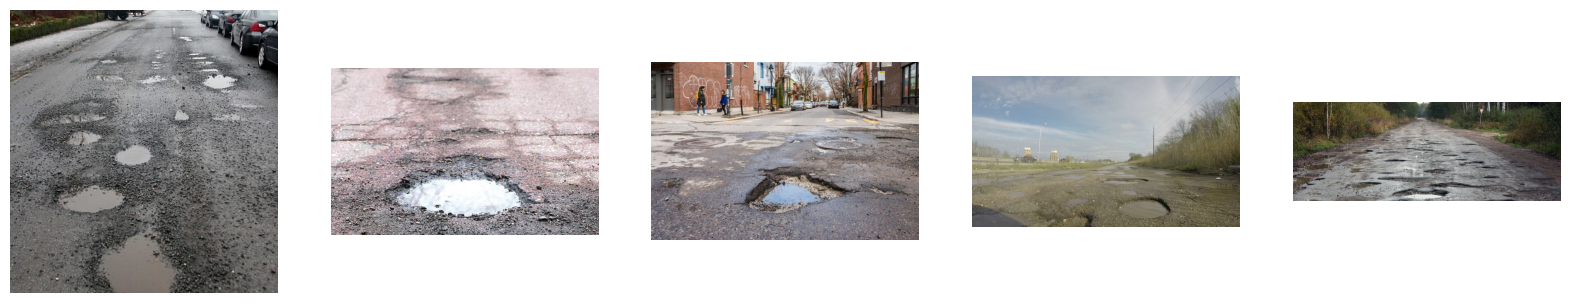

Class :  Plain


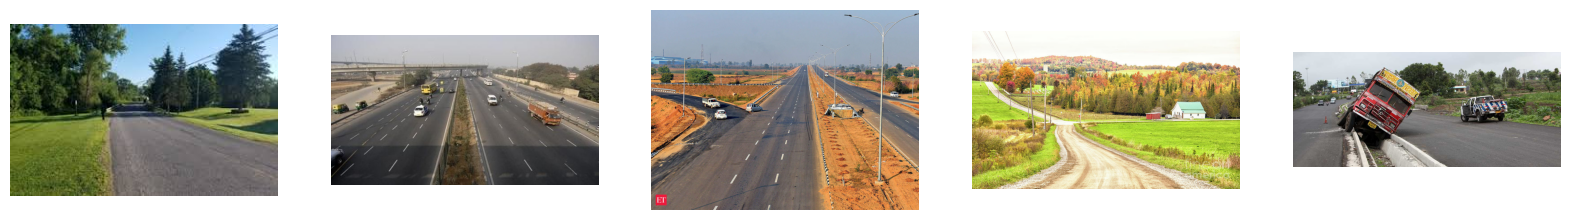

In [ ]:
# Visualization of train_path

plot_images(train_path)

Class :  Pothole


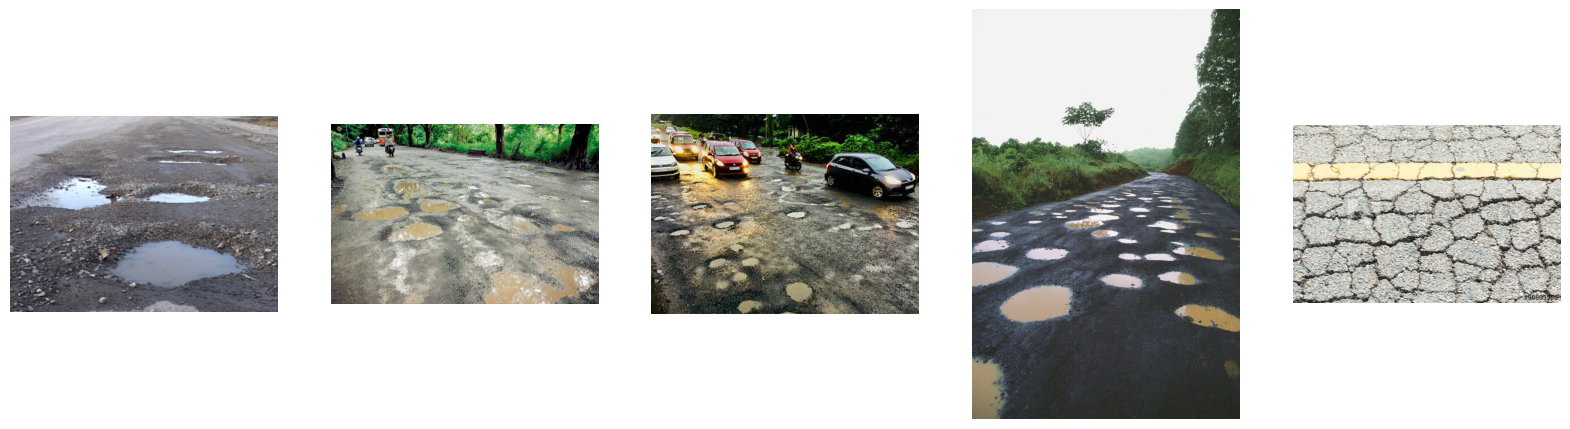

Class :  Plain


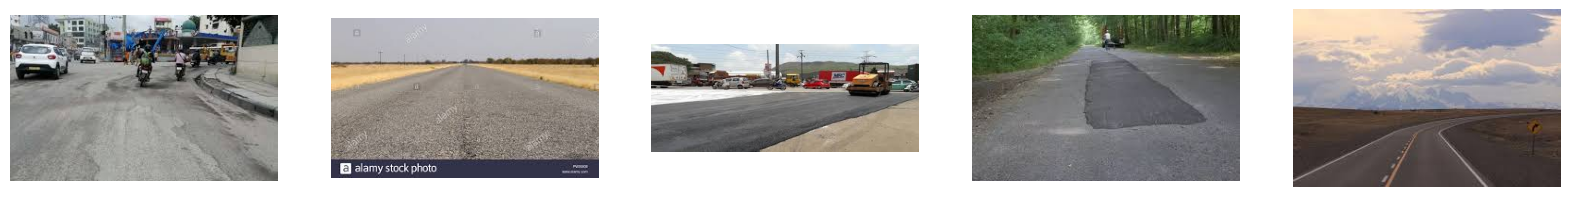

In [ ]:
# Visualization of `test_path`

plot_images(test_path)

Terdapat 2 label. pada data train dan data test. Itu merupakan contoh gambar


# 4. EDA

In [ ]:
# Create batch generator for train-set, val-set, and test-set

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.,
                                                                validation_split=0.4)

train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(150,150),
                                              class_mode='binary',
                                              subset='training',
                                              batch_size=32,
                                              shuffle=True,
                                              seed=2)

val_set = train_datagen.flow_from_directory(train_path,
                                            target_size=(150,150),
                                            class_mode='binary',
                                            subset='validation',
                                            batch_size=32,
                                            shuffle=True,
                                            seed=2)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(150,150),
                                            class_mode='binary',
                                            batch_size=32,
                                            shuffle=False,
                                            seed=2)

Found 435 images belonging to 2 classes.
Found 288 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


## 4.1 Class

In [ ]:
class_distribution = train_set.class_indices
print("Distribusi Kelas:", class_distribution)


Distribusi Kelas: {'Plain': 0, 'Pothole': 1}


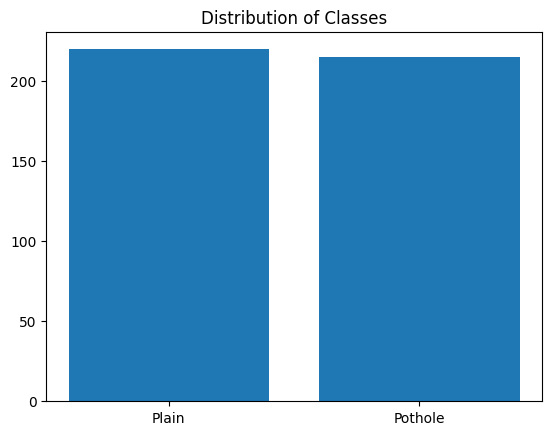

In [ ]:
classes = train_set.class_indices
class_counts = train_set.classes
plt.bar(classes.keys(), np.bincount(class_counts))
plt.title('Distribution of Classes')
plt.show()

Hasil visualisasi distribusi kelas menunjukkan bahwa dataset train memiliki distribusi yang seimbang antara kelas 'plain' dan 'ponthole', dengan jumlah gambar di kedua kelas hampir sama. Dengan distribusi yang seimbang ini, model yang dilatih cenderung memiliki performa yang lebih baik dan tidak bias terhadap salah satu kelas. Ini mengurangi risiko masalah ketidakseimbangan data yang dapat mempengaruhi kemampuan model dalam mendeteksi kedua kelas secara akurat."

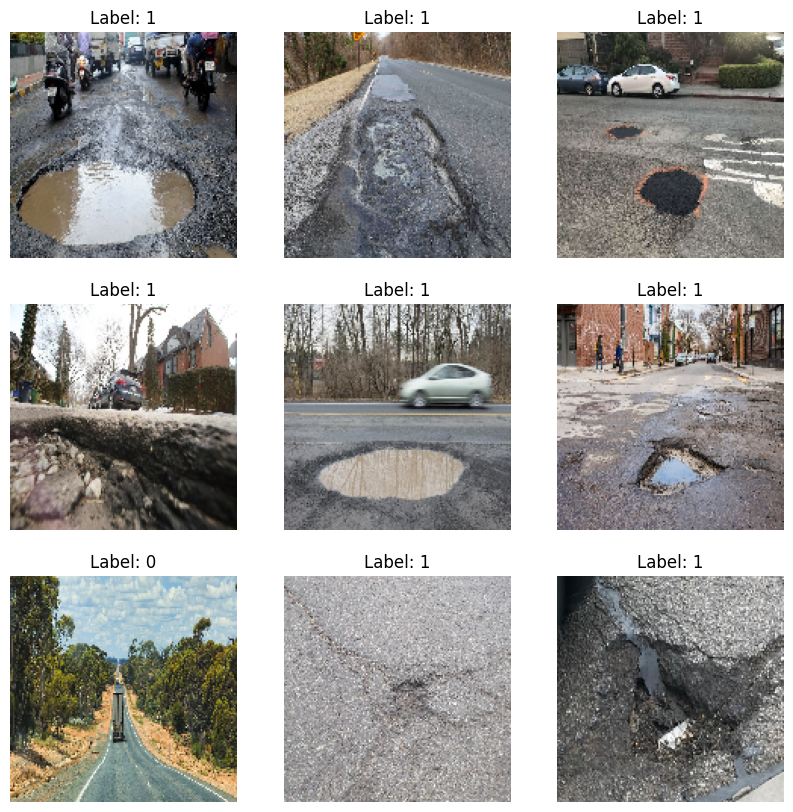

In [ ]:
# Mendapatkan batch pertama dari train_set
images, labels = next(train_set)

# Menampilkan 9 gambar pertama
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f'Label: {int(labels[i])}')
    plt.axis('off')
plt.show()


- Diketahui bahwa hanya terdapat 2 class pada data ini yaitu jalan mulus dan jalan berlubang.
- Rata-rata angle foto yang diambil kebanyak dari atas dan objeknya ditengah.
- Variasi Lubang: Gambar-gambar dengan label 1 menunjukkan beragam jenis lubang jalan. Ada lubang yang kecil, besar, dangkal, dalam, serta dengan kondisi aspal yang berbeda-beda (retak, berlubang dalam, dll.).
- Kondisi Lingkungan: Gambar-gambar diambil dalam berbagai kondisi lingkungan, seperti jalan perkotaan yang ramai, jalan pedesaan yang sepi, dan dalam kondisi cuaca yang berbeda-beda (kering, basah).
- Jalan Rata: Gambar dengan label 0 umumnya menunjukkan jalan yang mulus dan rata tanpa adanya kerusakan signifikan.

## 4.2 Color

Memasukkan ke Data Frame untuk tahu intensitas warna dari semua dataset.

In [ ]:
# Function to load images and convert them to a dataframe
def load_images_to_df(path):
    data = []
    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)
        if os.path.isdir(folder_path):
            for img_file in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_file)
                img = Image.open(img_path).convert('RGB')
                img_np = np.array(img)
                r_mean = np.mean(img_np[:, :, 0])
                g_mean = np.mean(img_np[:, :, 1])
                b_mean = np.mean(img_np[:, :, 2])
                data.append([img_path, folder, r_mean, g_mean, b_mean])

    df = pd.DataFrame(data, columns=['image_path', 'label', 'r_mean', 'g_mean', 'b_mean'])
    return df

# Load images from train and test sets
train_df = load_images_to_df(train_path)
test_df = load_images_to_df(test_path)

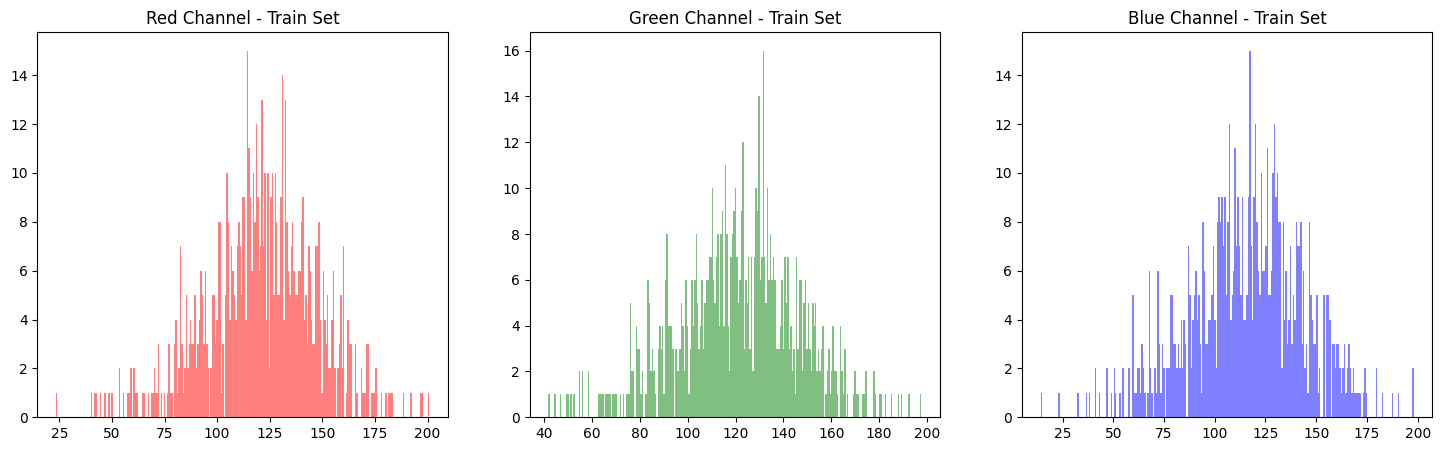

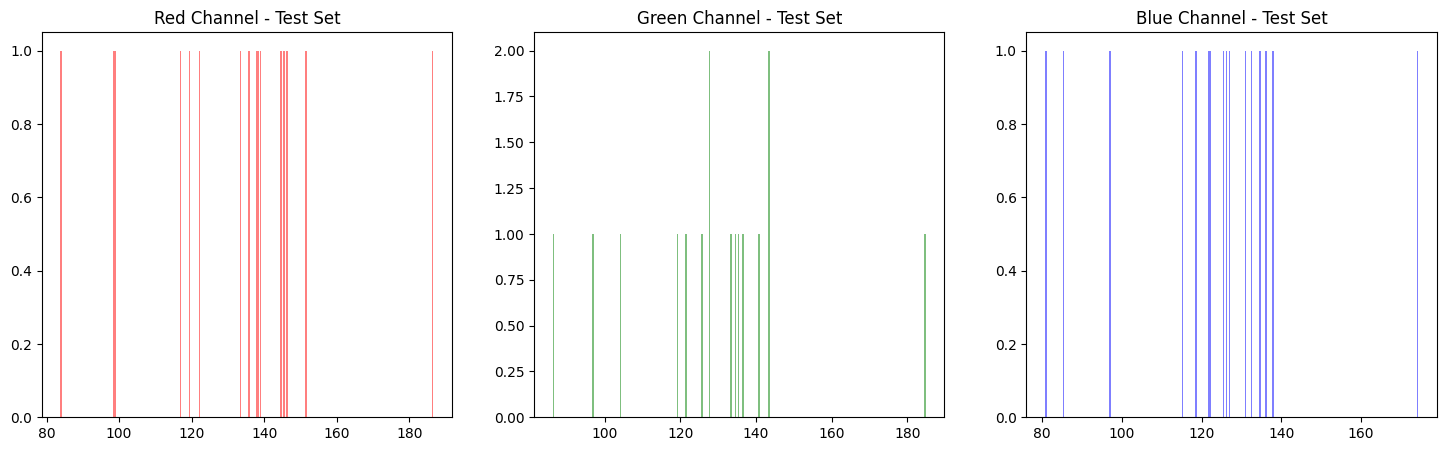

In [ ]:
# Visualisasi distribusi warna
def plot_rgb_distribution(df, label):
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 3, 1)
    plt.hist(df['r_mean'], bins=256, color='red', alpha=0.5)
    plt.title(f'Red Channel - {label}')

    plt.subplot(1, 3, 2)
    plt.hist(df['g_mean'], bins=256, color='green', alpha=0.5)
    plt.title(f'Green Channel - {label}')

    plt.subplot(1, 3, 3)
    plt.hist(df['b_mean'], bins=256, color='blue', alpha=0.5)
    plt.title(f'Blue Channel - {label}')

    plt.show()

# Plot distribusi untuk train set dan test set
plot_rgb_distribution(train_df, 'Train Set')
plot_rgb_distribution(test_df, 'Test Set')

1. Distribusi Warna:

  Histogram menunjukkan bagaimana warna di dalam gambar tersebar dalam tiga channel (merah, hijau, dan biru). Ini membantu kita memahami warna dominan di gambar jalan berlubang dan jalan mulus.
2. Data Pelatihan (Train Set):

  Di dataset pelatihan, kita melihat bahwa warna merah dan biru biasanya berada di sekitar nilai 125, sedangkan hijau sedikit lebih tinggi di 130. Ini berarti gambar-gambar ini memiliki kombinasi warna yang cukup konsisten.
3. Data Pengujian (Test Set):

  Di dataset pengujian, distribusi warnanya menunjukkan bahwa channel merah dan hijau lebih sering muncul di nilai yang lebih rendah (sekitar 100). Ini menunjukkan bahwa gambar di dataset pengujian mungkin berbeda dari yang ada di dataset pelatihan.
4. Pengaruh pada Model:

  Jika gambar pengujian memiliki warna yang berbeda dari gambar pelatihan, model mungkin kesulitan untuk mengklasifikasikan apakah gambar itu jalan berlubang atau mulus. Hal ini penting untuk diperhatikan agar model dapat belajar dengan baik.

# 5. Feature Engineering

## 5.1 - Preprocessing 1

In [ ]:
# Define hyperparameters

img_height= 150
img_width= 150
batch_size= 32

- Menggunakan pixel 150x150 dengan batch size 32

In [ ]:
# Create batch generator for train-set, val-set, and test-set

train_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.,  # scaling
                                                                    rotation_range=20,        # dipakein rotation untuk memutar gambar
                                                                    zoom_range=0.05,          # Gambar di zoom acak untuk mengetahui mengatasi jika gambar di zoom
                                                                    width_shift_range=0.05,   # pergeseran gambar horizontal. mengatasi di real world
                                                                    height_shift_range=0.05,  # menggeser gambar vertikal
                                                                    shear_range=0.05,         # penanganan untuk distorsi gambar
                                                                    horizontal_flip=True,     # gambar di flipping karena memang biji sangat mungkin di flip
                                                                    validation_split=0.4)

train_set_aug = train_datagen_aug.flow_from_directory(train_path,
                                                      target_size=(img_height,img_width),
                                                      class_mode='sparse',
                                                      subset='training',
                                                      batch_size=batch_size,
                                                      shuffle=True,
                                                      seed=2)

val_set_aug = train_datagen_aug.flow_from_directory(train_path,
                                                    target_size=(img_height,img_width),
                                                    class_mode='sparse',
                                                    subset='validation',
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    seed=2)

test_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

test_set_aug = test_datagen_aug.flow_from_directory(test_path,
                                                    target_size=(img_height,img_width),
                                                    class_mode='sparse',
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    seed=2)

Found 435 images belonging to 2 classes.
Found 288 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


- Dilakukan Data Augmentation pada data dengan menggunakan semua fiturnya yaitu zoom, rotation, width shift, height shift, shear range dan horizontal flip.
- Setelah dilakukan pembagian data terdapat 2 class dengan data train sebanyak 435 data validation sebanyak 288 dan data test sebanyak 40.

## 5.2 - Preprocessing 2

In [ ]:
# Download pretrained model


pretrained_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height,img_width, 3))
pretrained_model.trainable = False

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
# Create batch generator for train-set, val-set, and test-set

train_datagen_tl = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,           # dipakein rotation untuk memutar gambar
                                                                   zoom_range=0.05,             # Gambar di zoom acak untuk mengetahui mengatasi jika gambar di zoom
                                                                   width_shift_range=0.05,      # pergeseran gambar horizontal. mengatasi di real world
                                                                   height_shift_range=0.05,     # menggeser gambar vertikal
                                                                   shear_range=0.05,            # penanganan untuk distorsi gambar
                                                                   horizontal_flip=True,        # gambar di flipping karena memang biji sangat mungkin di flip
                                                                   validation_split=0.4,
                                                                   preprocessing_function=preprocess_input)

train_set_tl = train_datagen_tl.flow_from_directory(train_path,
                                                    target_size=(img_height,img_width),
                                                    class_mode='sparse',
                                                    subset='training',
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    seed=2)

val_set_tl = train_datagen_tl.flow_from_directory(train_path,
                                                  target_size=(img_height,img_width),
                                                  class_mode='sparse',
                                                  subset='validation',
                                                  batch_size=batch_size,
                                                  shuffle=True,
                                                  seed=2)

test_datagen_tl = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

test_set_tl = test_datagen_tl.flow_from_directory(test_path,
                                                  target_size=(img_height,img_width),
                                                  class_mode='sparse',
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  seed=2)

Found 435 images belonging to 2 classes.
Found 288 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


# 6. ANN Training (Sequential API/Functional API)

## 6.1 Model Definition

In [ ]:
# Clear session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

Menggunakan seed 20

In [ ]:
# Create Sequential API model

# sequential API
model_aug = Sequential()
model_aug.add(Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width,3)))
model_aug.add(MaxPooling2D(2, 2))
model_aug.add(Conv2D(64, (3,3), activation='relu'))
model_aug.add(MaxPooling2D(2, 2))
model_aug.add(Conv2D(128, (3,3),activation='relu'))
model_aug.add(MaxPooling2D(2, 2))
model_aug.add(Flatten())
model_aug.add(Dropout(0.5))
model_aug.add(Dense(512, activation='relu'))
model_aug.add(Dense(6, activation='softmax'))

# Compile
model_aug.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model_aug.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

- Menggunakan 2 hidden layer dengan hidden layer pertama sebanyak 64 neuron dan hidden layer kedua sebanyak 128 neuron.
- Pada output layer digunakan activation sigmoid dikarenakan data yang digunakan bersifat binary.

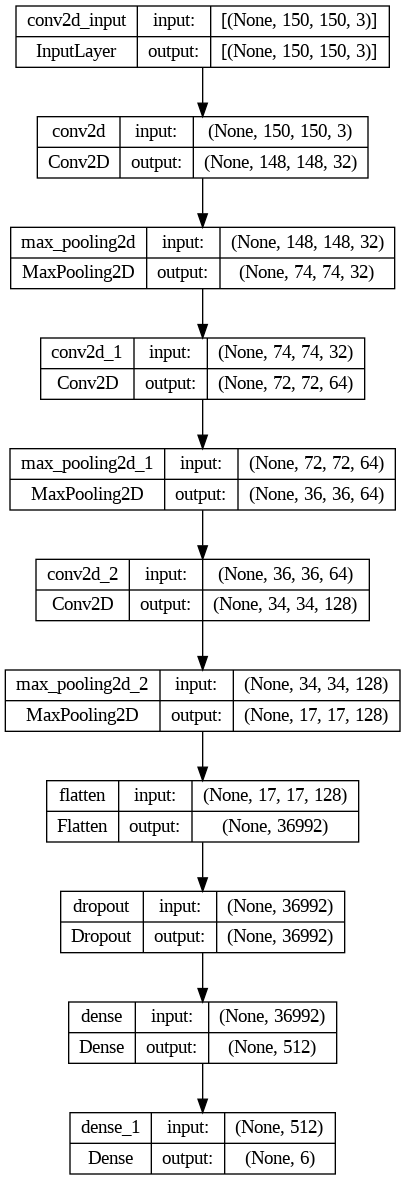

In [ ]:
# Plot layers

tf.keras.utils.plot_model(model_aug, show_shapes=True)

## 6.2 Model Training

In [ ]:
# Train the model

%%time
history_aug = model_aug.fit(train_set_aug, epochs=20, validation_data=val_set_aug, batch_size=batch_size)

Epoch 1/20
14/14 [==============================] - 20s 1s/step - loss: 1.3364 - accuracy: 0.4483 - val_loss: 0.6749 - val_accuracy: 0.6979
Epoch 2/20
14/14 [==============================] - 13s 1s/step - loss: 0.6817 - accuracy: 0.5770 - val_loss: 0.6195 - val_accuracy: 0.6354
Epoch 3/20
14/14 [==============================] - 14s 1s/step - loss: 0.5027 - accuracy: 0.7862 - val_loss: 0.3588 - val_accuracy: 0.8472
Epoch 4/20
14/14 [==============================] - 19s 1s/step - loss: 0.3199 - accuracy: 0.8690 - val_loss: 0.3315 - val_accuracy: 0.8333
Epoch 5/20
14/14 [==============================] - 14s 1s/step - loss: 0.3680 - accuracy: 0.8529 - val_loss: 0.2757 - val_accuracy: 0.8854
Epoch 6/20
14/14 [==============================] - 14s 1s/step - loss: 0.3095 - accuracy: 0.8644 - val_loss: 0.2684 - val_accuracy: 0.9167
Epoch 7/20
14/14 [==============================] - 14s 1s/step - loss: 0.2504 - accuracy: 0.8989 - val_loss: 0.2447 - val_accuracy: 0.8924
Epoch 8/20
14/14 [==

- Dilakukan model training 20 epochs.
- waktu pembelajaran model sekitar 4 menit

## 6.3 Model Evaluation

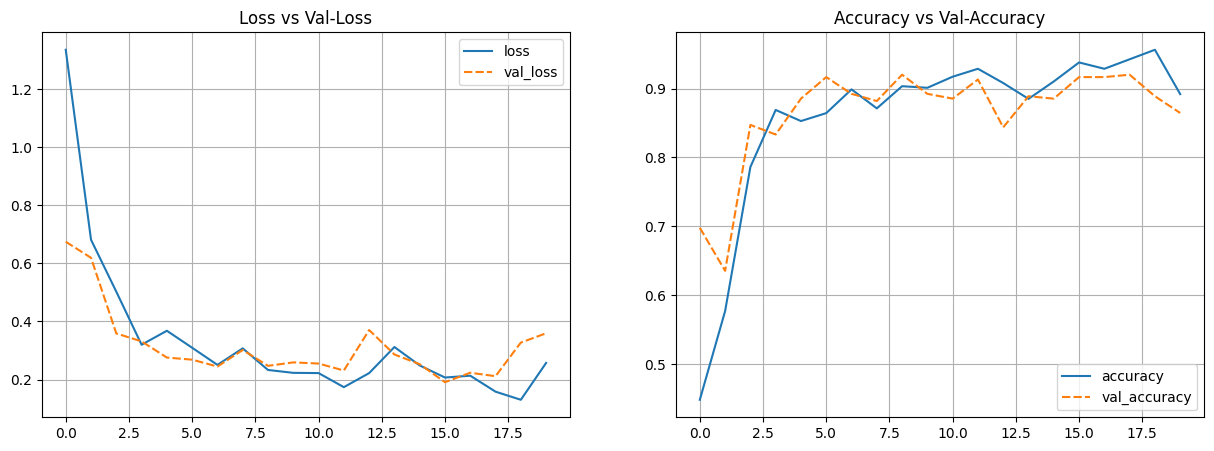

In [ ]:
# Plot training results

history_aug_df = pd.DataFrame(history_aug.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_aug_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_aug_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

1. Loss vs Val-Loss:

- Loss (garis biru) menunjukkan nilai kehilangan (loss) pada data pelatihan, sedangkan Val-Loss (garis oranye putus-putus) menunjukkan nilai kehilangan pada data validasi.
- Terlihat bahwa Loss menurun secara signifikan selama pelatihan, menunjukkan bahwa model semakin baik dalam memprediksi data pelatihan.
- Val-Loss juga menurun, tetapi dengan fluktuasi yang lebih besar. Hal ini menunjukkan bahwa model cukup stabil, meskipun ada beberapa saat di mana model tidak terlalu baik pada data validasi.
2. Accuracy vs Val-Accuracy:

- Accuracy (garis biru) menunjukkan akurasi model pada data pelatihan, sedangkan Val-Accuracy (garis oranye putus-putus) menunjukkan akurasi pada data validasi.
- Akurasi pelatihan meningkat secara konsisten, mencapai hampir 90%, menunjukkan bahwa model belajar dengan baik dari data pelatihan.
- Akurasi validasi juga menunjukkan tren peningkatan yang baik, meskipun ada beberapa penurunan yang menunjukkan bahwa model mungkin sedikit overfitting.

In [ ]:
# Check the performance of test-set

## Get the probability
y_pred_prob_aug = model_aug.predict_generator(test_set)

## Get class with maximum probability
y_pred_class_aug = np.argmax(y_pred_prob_aug, axis=-1)

## Display Classification Report
print(classification_report(test_set_aug.classes, y_pred_class_aug, target_names=np.array(list(train_set_aug.class_indices.keys()))))

              precision    recall  f1-score   support

       Plain       0.75      0.75      0.75         8
     Pothole       0.75      0.75      0.75         8

    accuracy                           0.75        16
   macro avg       0.75      0.75      0.75        16
weighted avg       0.75      0.75      0.75        16



Model memiliki akurasi 75% dalam mendeteksi jalan berlubang (pothole) dan jalan datar (plain). Nilai precision, recall, dan f1-score untuk kedua kelas adalah 0.75, menunjukkan performa yang seimbang dalam prediksi kedua kategori.

# 7. ANN Improvement (Sequential API/Functional API)

## 7.1 - Model Definition

In [ ]:
# Clear session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

Clear session dan penggunaan random seed 20

In [ ]:
# Create Sequential API model

model_tl = Sequential()
# penggunaan pretrained Model
model_tl.add(pretrained_model)

model_tl.add(Flatten())
model_tl.add(Dense(512, activation='relu'))
model_tl.add(Dense(6, activation='softmax'))

# Compile
model_tl.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model_tl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dense_1 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 18912582 (72.15 MB)
Trainable params: 4197894 (16.01 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


Menggunakan pretrained Model vgg16 untuk memperbaiki model.

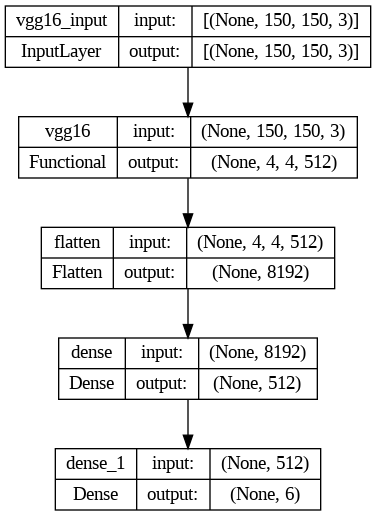

In [ ]:
# Plot layers

tf.keras.utils.plot_model(model_tl, show_shapes=True)

## 7.2 Model Training

In [ ]:
# Train the model

%%time
history_tl = model_tl.fit(train_set, epochs=20, validation_data=val_set, batch_size=batch_size)

Epoch 1/20
14/14 [==============================] - 18s 1s/step - loss: 0.8878 - accuracy: 0.7034 - val_loss: 0.1320 - val_accuracy: 0.9549
Epoch 2/20
14/14 [==============================] - 11s 792ms/step - loss: 0.2012 - accuracy: 0.9471 - val_loss: 0.1054 - val_accuracy: 0.9618
Epoch 3/20
14/14 [==============================] - 10s 757ms/step - loss: 0.0503 - accuracy: 0.9862 - val_loss: 0.0638 - val_accuracy: 0.9757
Epoch 4/20
14/14 [==============================] - 11s 798ms/step - loss: 0.0105 - accuracy: 0.9954 - val_loss: 0.0537 - val_accuracy: 0.9757
Epoch 5/20
14/14 [==============================] - 11s 797ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0507 - val_accuracy: 0.9722
Epoch 6/20
14/14 [==============================] - 11s 748ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0486 - val_accuracy: 0.9757
Epoch 7/20
14/14 [==============================] - 11s 761ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0510 - val_accuracy: 0.9757
Ep

Model telah dilatih dengan menggunakan 20 Epoch waktu pembelajaran 4 menit juga namun lebih cepat 41 detik

## 7.3 Model Evaluation

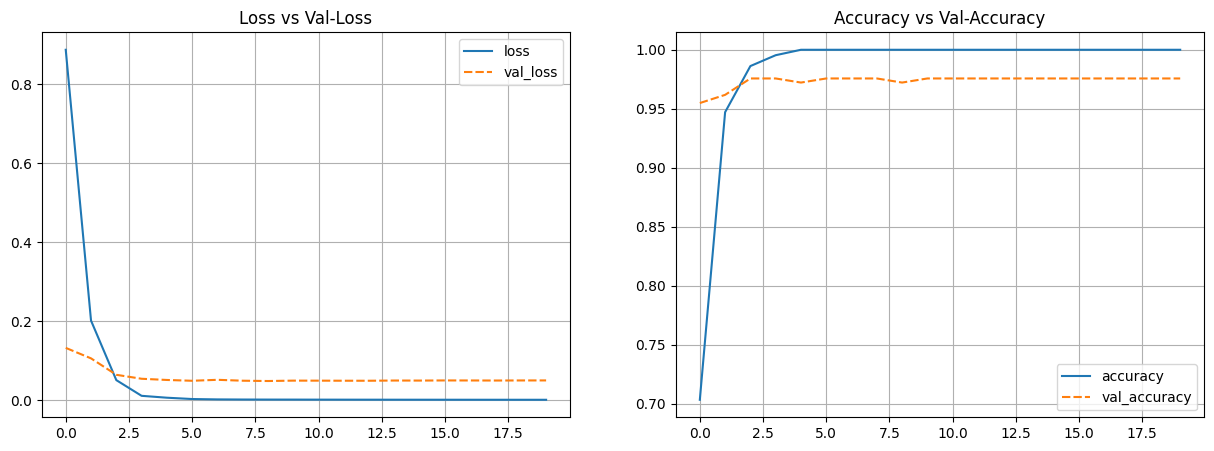

In [ ]:
# Plot training results

history_tl_df = pd.DataFrame(history_tl.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_tl_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_tl_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

1. Loss vs. Val-Loss:

- Grafik menunjukkan bahwa nilai loss pada data pelatihan (garis biru) menurun secara signifikan, terutama pada epoch awal, dan kemudian stabil di sekitar 0.1. Ini menandakan bahwa model berhasil belajar dari data pelatihan.
- Di sisi lain, nilai val_loss (garis oranye putus-putus) juga menunjukkan penurunan, tetapi lebih lambat dibandingkan dengan loss. Setelah epoch ke-2, val_loss mulai stabil di sekitar 0.2. Hal ini menunjukkan bahwa model mampu menggeneralisasi dengan baik pada data validasi, meskipun ada kemungkinan sedikit overfitting.
2. Accuracy vs. Val-Accuracy:

- Grafik menunjukkan bahwa akurasi pada data pelatihan (garis biru) meningkat dengan cepat dan mendekati 1 (100%) setelah epoch ke-4. Ini menandakan bahwa model belajar dengan baik dari data pelatihan.
- Akurasi pada data validasi (garis oranye putus-putus) juga meningkat dan stabil di sekitar 0.95 (95%). Ini menunjukkan bahwa model tidak hanya belajar dari data pelatihan, tetapi juga mampu mengklasifikasikan data validasi dengan akurasi yang tinggi.

In [ ]:
# Check the performance of test-set

## Get the probability
y_pred_prob_tl = model_tl.predict_generator(test_set_tl)

## Get class with maximum probability
y_pred_class_tl = np.argmax(y_pred_prob_tl, axis=-1)

## Display Classification Report
print(classification_report(test_set_tl.classes, y_pred_class_tl, target_names=np.array(list(train_set_tl.class_indices.keys()))))

              precision    recall  f1-score   support

       Plain       0.80      0.50      0.62         8
     Pothole       0.64      0.88      0.74         8

    accuracy                           0.69        16
   macro avg       0.72      0.69      0.68        16
weighted avg       0.72      0.69      0.68        16



Model memiliki akurasi 69% dalam mendeteksi jalan berlubang (pothole) dan jalan datar (plain). Untuk kelas Plain, precision tinggi (0.80) tetapi recall rendah (0.50), artinya banyak jalan datar yang terprediksi salah. Sebaliknya, untuk Pothole, recall lebih tinggi (0.88) menunjukkan model lebih baik dalam mendeteksi jalan berlubang, meski precision lebih rendah (0.64).

# 8. Model Saving

Setelah kita melihat model terbaik kita, selanjutnya akan kita save untuk kita tes modelnya pada model inference.

In [ ]:
# Menyimpan model beserta bobotnya dalam format H5
model_aug.save('model.h5')

Model disimpan dalam colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Simpan model ke Google Drive
model_tl.save('/content/drive/My Drive/model.h5')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 9. Conclusion

Pada bagian ini akan menampilkan beberapa kesimpulan

## 9.1 Kesimpulan EDA

1. Distribusi Kelas:

  Visualisasi distribusi kelas menunjukkan bahwa dataset pelatihan memiliki keseimbangan yang baik antara dua kelas, yaitu 'plain' dan 'pothole'. Keseimbangan ini sangat penting, karena model yang dilatih dengan dataset yang seimbang cenderung memiliki performa yang lebih baik dan tidak bias terhadap salah satu kelas. Dengan demikian, risiko masalah ketidakseimbangan data yang dapat mempengaruhi akurasi deteksi dapat diminimalkan.
2. Variasi dan Kondisi Gambar:

  Gambar-gambar yang dilabeli sebagai 'pothole' menunjukkan variasi yang beragam dalam jenis lubang, termasuk ukuran, kedalaman, dan kondisi aspal. Gambar diambil dalam berbagai kondisi lingkungan, seperti jalan perkotaan yang ramai dan jalan pedesaan yang sepi, serta dalam kondisi cuaca yang bervariasi. Sementara itu, gambar dengan label 'plain' umumnya menunjukkan jalan yang mulus dan rata tanpa kerusakan signifikan.
3. Distribusi Warna:

  - Analisis histogram dari distribusi warna dalam tiga channel (merah, hijau, dan biru) menunjukkan bahwa pada dataset pelatihan, warna merah dan biru cenderung berada di sekitar nilai 125, sedangkan hijau sedikit lebih tinggi di sekitar 130. Ini menunjukkan konsistensi dalam kombinasi warna pada gambar pelatihan.
  - Namun, distribusi warna pada dataset pengujian menunjukkan bahwa channel merah dan hijau cenderung memiliki nilai yang lebih rendah (sekitar 100). Perbedaan ini dapat mempengaruhi kemampuan model dalam mengklasifikasikan gambar antara jalan berlubang dan jalan mulus, sehingga perlu diwaspadai.
4. Implikasi untuk Model:

  Penting untuk memastikan bahwa dataset pelatihan dan pengujian memiliki kesamaan dalam hal warna dan kondisi gambar. Jika terdapat perbedaan signifikan, model mungkin kesulitan untuk melakukan klasifikasi yang akurat. Oleh karena itu, penambahan variasi gambar pada dataset pelatihan dapat membantu meningkatkan kinerja model.

## 9.2 Kesimpulan Model

1. Model Pertama:

- Precision: 0.75 untuk kedua kelas (Plain dan Pothole) menunjukkan bahwa model memiliki keseimbangan dalam mengidentifikasi kedua kelas.
- Recall: 0.75 untuk kedua kelas menunjukkan bahwa model berhasil menangkap 75% dari total kasus aktual untuk setiap kelas.
- F1-Score: 0.75 untuk kedua kelas menandakan bahwa model memiliki keseimbangan antara precision dan recall.
- Akurasi: 75% menunjukkan bahwa model dapat mengklasifikasikan dengan benar 75% dari total data.
2. Model Kedua:

- Precision: Model ini menunjukkan peningkatan precision untuk kelas Plain (0.80), tetapi penurunan untuk kelas Pothole (0.64).
- Recall: Model ini memiliki recall yang lebih rendah untuk kelas Plain (0.50), sementara kelas Pothole menunjukkan recall yang lebih baik (0.88).
- F1-Score: Nilai F1-score untuk kelas Plain (0.62) lebih rendah dibandingkan dengan kelas Pothole (0.74), menunjukkan ketidakseimbangan dalam kinerja model.
- Akurasi: Model kedua memiliki akurasi yang lebih rendah yaitu 69%, menunjukkan penurunan kemampuan klasifikasi secara keseluruhan dibandingkan model pertama.

Kesimpulan: Model pertama lebih baik dalam hal keseimbangan antara precision, recall, dan f1-score untuk kedua kelas, dengan akurasi lebih tinggi. Model kedua menunjukkan hasil yang kurang konsisten, terutama dengan recall yang rendah untuk kelas Plain, meskipun memiliki f1-score yang lebih baik untuk kelas Pothole.

## 9.3 Kesimpulan Keseluruhan

Analisis eksplorasi data (EDA) menunjukkan bahwa dataset untuk deteksi jalan berlubang (pothole) dan jalan mulus (plain) memiliki distribusi yang seimbang, yang penting untuk pelatihan model yang efektif. Rata-rata sudut pengambilan foto menunjukkan konsistensi, sementara variasi jenis lubang dan kondisi lingkungan memberikan tantangan yang perlu diperhatikan. Distribusi warna pada dataset menunjukkan adanya perbedaan antara data pelatihan dan pengujian, yang dapat mempengaruhi kemampuan model dalam melakukan klasifikasi.

Dalam evaluasi model, hasil menunjukkan bahwa model pertama memiliki akurasi yang lebih baik (75%) dibandingkan model kedua (69%). Namun, keduanya menunjukkan potensi perbaikan, terutama dalam hal precision dan recall untuk masing-masing kelas. Model pertama memiliki performa yang lebih seimbang, sementara model kedua menunjukkan ketidakseimbangan yang perlu diatasi.

Tujuan dari proyek ini adalah untuk membangun model deteksi yang efektif untuk mengklasifikasikan jalan sebagai 'pothole' atau 'plain', sehingga dapat digunakan untuk meningkatkan keselamatan dan kenyamanan pengguna jalan. Meskipun hasil awal menunjukkan potensi yang menjanjikan, diperlukan langkah-langkah perbaikan seperti augmentasi data, peningkatan kualitas gambar, dan evaluasi model secara berkelanjutan untuk mencapai akurasi dan generalisasi yang lebih baik.

Secara keseluruhan, proyek ini menyoroti pentingnya pemahaman mendalam terhadap data dan evaluasi model dalam proses pengembangan sistem deteksi jalan berlubang. Upaya berkelanjutan dalam memperbaiki model akan berkontribusi pada pengembangan solusi yang lebih efektif dan adaptif dalam menghadapi tantangan di dunia nyata.